# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [62]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [92]:
# Set the API base URL
url = "https://api.openweathermap.org"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"/data/2.5/weather?q={city}&APPID={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # print(json.dumps(city_weather, indent=4, sort_keys=True))
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nizhneyansk
'coord'
City not found. Skipping...
Processing Record 2 of Set 1 | codrington
Processing Record 3 of Set 1 | roald
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | carutapera
Processing Record 7 of Set 1 | rawson
Processing Record 8 of Set 1 | labuhan
Processing Record 9 of Set 1 | tumannyy
'coord'
City not found. Skipping...
Processing Record 10 of Set 1 | salym
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | creel
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | pangnirtung
Processing Record 16 of Set 1 | paciran
Processing Record 17 of Set 1 | ballybofey
Processing Record 18 of Set 1 | ponta do sol
Processing Record 19 of Set 1 | komsomolskiy
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | touros
Proces

Processing Record 35 of Set 4 | bagnols-sur-ceze
Processing Record 36 of Set 4 | havre-saint-pierre
Processing Record 37 of Set 4 | nishihara
Processing Record 38 of Set 4 | arraial do cabo
Processing Record 39 of Set 4 | faanui
Processing Record 40 of Set 4 | kavieng
Processing Record 41 of Set 4 | maun
Processing Record 42 of Set 4 | taburi
'coord'
City not found. Skipping...
Processing Record 43 of Set 4 | golden
Processing Record 44 of Set 4 | luderitz
Processing Record 45 of Set 4 | dunedin
Processing Record 46 of Set 4 | san cristobal
Processing Record 47 of Set 4 | broken hill
Processing Record 48 of Set 4 | meulaboh
Processing Record 49 of Set 4 | kulhudhuffushi
Processing Record 0 of Set 5 | saint-augustin
Processing Record 1 of Set 5 | kota belud
Processing Record 2 of Set 5 | aklavik
Processing Record 3 of Set 5 | talnakh
Processing Record 4 of Set 5 | lompoc
Processing Record 5 of Set 5 | port blair
Processing Record 6 of Set 5 | progreso
Processing Record 7 of Set 5 | okty

Processing Record 21 of Set 8 | kenora
Processing Record 22 of Set 8 | winslow
Processing Record 23 of Set 8 | adrar
Processing Record 24 of Set 8 | broome
Processing Record 25 of Set 8 | muisne
Processing Record 26 of Set 8 | half moon bay
Processing Record 27 of Set 8 | puerto del rosario
Processing Record 28 of Set 8 | otradnoye
Processing Record 29 of Set 8 | nouadhibou
Processing Record 30 of Set 8 | sao gabriel da cachoeira
Processing Record 31 of Set 8 | cururupu
Processing Record 32 of Set 8 | mount gambier
Processing Record 33 of Set 8 | salina cruz
Processing Record 34 of Set 8 | sabang
Processing Record 35 of Set 8 | terra santa
Processing Record 36 of Set 8 | port hardy
Processing Record 37 of Set 8 | grootfontein
Processing Record 38 of Set 8 | shelburne
Processing Record 39 of Set 8 | habiganj
Processing Record 40 of Set 8 | kathu
Processing Record 41 of Set 8 | la orilla
Processing Record 42 of Set 8 | beringovskiy
Processing Record 43 of Set 8 | isangel
Processing Recor

Processing Record 5 of Set 12 | papara
Processing Record 6 of Set 12 | nhulunbuy
Processing Record 7 of Set 12 | baraboo
Processing Record 8 of Set 12 | carikar
'coord'
City not found. Skipping...
Processing Record 9 of Set 12 | port shepstone
Processing Record 10 of Set 12 | tete
Processing Record 11 of Set 12 | anadyr
Processing Record 12 of Set 12 | duz
'coord'
City not found. Skipping...
Processing Record 13 of Set 12 | slavsk
Processing Record 14 of Set 12 | noshiro
Processing Record 15 of Set 12 | moranbah
Processing Record 16 of Set 12 | yuli
Processing Record 17 of Set 12 | oussouye
Processing Record 18 of Set 12 | acurenam
Processing Record 19 of Set 12 | san luis rio colorado
Processing Record 20 of Set 12 | bargal
'coord'
City not found. Skipping...
Processing Record 21 of Set 12 | katherine
Processing Record 22 of Set 12 | labutta
'coord'
City not found. Skipping...
Processing Record 23 of Set 12 | fukue
Processing Record 24 of Set 12 | moerai
Processing Record 25 of Set 12

In [93]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [94]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,codrington,-38.2667,141.9667,285.45,94,10,3.43,AU,1681413180
1,roald,62.5833,6.1333,285.66,46,0,6.17,NO,1681413745
2,mahebourg,-20.4081,57.7000,298.29,94,20,1.54,MU,1681413746
3,jamestown,42.0970,-79.2353,299.95,27,0,6.69,US,1681413150
4,carutapera,-1.1950,-46.0200,301.99,73,99,3.55,BR,1681413746


In [95]:
# convert Kelvin to Celsius
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,codrington,-38.2667,141.9667,12.30,94,10,3.43,AU,1681413180
1,roald,62.5833,6.1333,12.51,46,0,6.17,NO,1681413745
2,mahebourg,-20.4081,57.7000,25.14,94,20,1.54,MU,1681413746
3,jamestown,42.0970,-79.2353,26.80,27,0,6.69,US,1681413150
4,carutapera,-1.1950,-46.0200,28.84,73,99,3.55,BR,1681413746


In [96]:
# Export the City_Data into a csv
# Creating the output_data directory if it doesn't exist
isExists = os.path.isdir("output_data")
if not isExists:
    os.mkdir("output_data")
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [97]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,codrington,-38.2667,141.9667,12.30,94,10,3.43,AU,1681413180
1,roald,62.5833,6.1333,12.51,46,0,6.17,NO,1681413745
2,mahebourg,-20.4081,57.7000,25.14,94,20,1.54,MU,1681413746
3,jamestown,42.0970,-79.2353,26.80,27,0,6.69,US,1681413150
4,carutapera,-1.1950,-46.0200,28.84,73,99,3.55,BR,1681413746


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

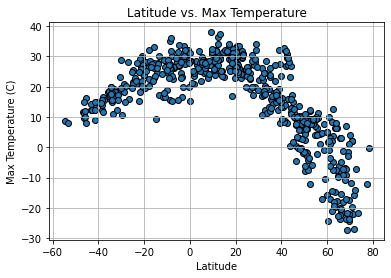

In [98]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temp = city_data_df['Max Temp']
plt.scatter(latitude, temp, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Latitude vs. Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

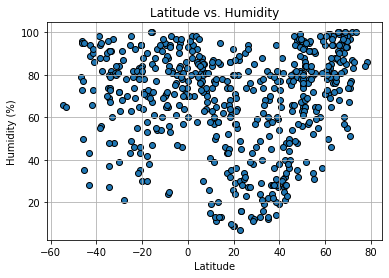

In [99]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity'].astype("float")
plt.scatter(latitude, humidity, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

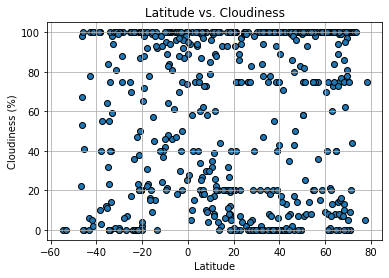

In [100]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitude, cloudiness, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

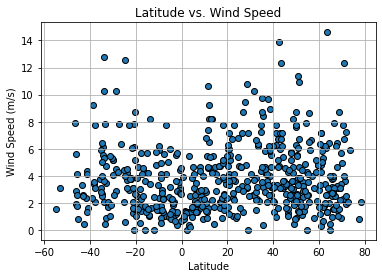

In [101]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']
plt.scatter(latitude, wind_speed, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [102]:
# Define a function to create Linear Regression plots
def linreg(x_axis, y_axis, xlabel, ylabel, title, xpos, ypos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    print("The r-value is " + str(rvalue) + ".")
    regress_values = slope * x_axis + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regress_values, "r-")
    plt.annotate(line_eq,(xpos, ypos),fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    return str(rvalue)

In [103]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,roald,62.5833,6.1333,12.51,46,0,6.17,NO,1681413745
3,jamestown,42.0970,-79.2353,26.80,27,0,6.69,US,1681413150
7,salym,60.0625,71.4789,-15.61,94,9,2.92,RU,1681413182
9,butaritari,3.0707,172.7902,27.18,81,75,5.46,KI,1681413748
10,creel,27.7500,-107.6333,17.34,13,83,9.46,MX,1681413183


In [104]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,codrington,-38.2667,141.9667,12.30,94,10,3.43,AU,1681413180
2,mahebourg,-20.4081,57.7000,25.14,94,20,1.54,MU,1681413746
4,carutapera,-1.1950,-46.0200,28.84,73,99,3.55,BR,1681413746
5,rawson,-43.3002,-65.1023,12.28,43,6,3.34,AR,1681413747
6,labuhan,-6.8844,112.2051,26.18,82,46,4.15,ID,1681413182


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8529617754845613.


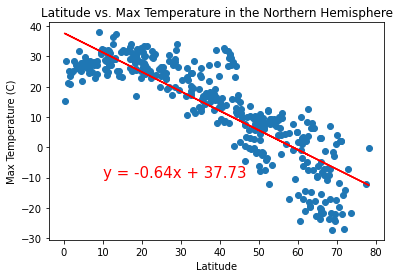

In [105]:
# Linear regression on Northern Hemisphere
northern_hemi_lat = northern_hemi_df['Lat']
rval1 = linreg(northern_hemi_lat, northern_hemi_df['Max Temp'], "Latitude", "Max Temperature (C)", "Latitude vs. Max Temperature in the Northern Hemisphere", 10, -10)

The r-value is 0.7601165962993117.


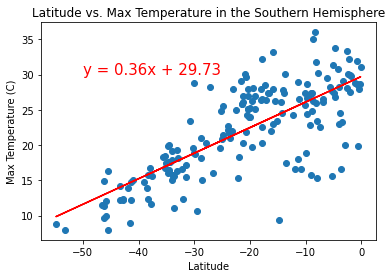

In [106]:
# Linear regression on Southern Hemisphere
southern_hemi_lat = southern_hemi_df['Lat']
rval2 = linreg(southern_hemi_lat, southern_hemi_df['Max Temp'], "Latitude", "Max Temperature (C)", "Latitude vs. Max Temperature in the Southern Hemisphere", -50, 30)

In [107]:
from IPython.display import Markdown as md
md(f"**Discussion about the linear relationship:** In the northern hemisphere there is a strong negative correlation between latitude and temperature, with an r-value of {rval1}. In the southern hemisphere there is a moderate correlation between latitude and temperature, with an r-value of only {rval2}. Although, when we plot both hemispheres on the same graph, it is clear that a parabolic regression that reaches its apex near the equator would fit the data better than linear regressions do.")

**Discussion about the linear relationship:** In the northern hemisphere there is a strong negative correlation between latitude and temperature, with an r-value of -0.8529617754845613. In the southern hemisphere there is a moderate correlation between latitude and temperature, with an r-value of only 0.7601165962993117. Although, when we plot both hemispheres on the same graph, it is clear that a parabolic regression that reaches its apex near the equator would fit the data better than linear regressions do.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.27046578853279507.


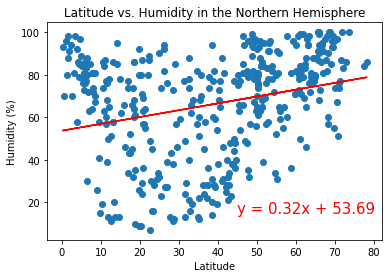

In [108]:
# Northern Hemisphere
rval3 = linreg(northern_hemi_lat, northern_hemi_df['Humidity'], "Latitude", "Humidity (%)", "Latitude vs. Humidity in the Northern Hemisphere", 45, 15)

The r-value is 0.023245708777985385.


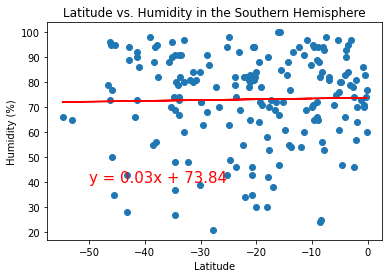

In [109]:
# Southern Hemisphere
rval4 = linreg(southern_hemi_lat, southern_hemi_df['Humidity'], "Latitude", "Humidity (%)", "Latitude vs. Humidity in the Southern Hemisphere", -50, 40)

In [110]:
md(f"**Discussion about the linear relationship:** In the northern hemisphere there is a very weak correlation between latitude and humidity, with an r-value of {rval3}. In the southern hemisphere there is also a very weak correlation between latitude and humidity, with an r-value of only {rval4}. Overall, linear regressions do not seem to fit this data very well, and there is little correlation between latitude and humidity.")

**Discussion about the linear relationship:** In the northern hemisphere there is a very weak correlation between latitude and humidity, with an r-value of 0.27046578853279507. In the southern hemisphere there is also a very weak correlation between latitude and humidity, with an r-value of only 0.023245708777985385. Overall, linear regressions do not seem to fit this data very well, and there is little correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.10830115834337689.


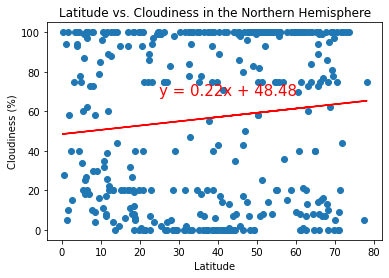

In [111]:
# Northern Hemisphere
rval5 = linreg(northern_hemi_lat, northern_hemi_df['Cloudiness'], "Latitude", "Cloudiness (%)", "Latitude vs. Cloudiness in the Northern Hemisphere", 25, 68)

The r-value is 0.3192204344712598.


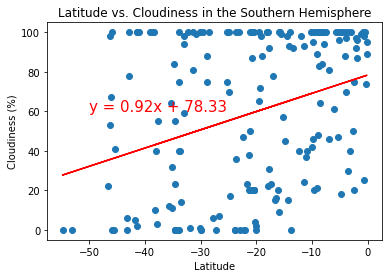

In [112]:
# Southern Hemisphere
rval6 = linreg(southern_hemi_lat, southern_hemi_df['Cloudiness'], "Latitude", "Cloudiness (%)", "Latitude vs. Cloudiness in the Southern Hemisphere", -50, 60)

In [113]:
md(f"**Discussion about the linear relationship:** In the northern hemisphere there is almost no correlation between latitude and cloudiness, with an r-value of {rval5}. In the southern hemisphere, there is a slight correlation between latitude and cloudiness, with an r-value of {rval6}. Overall, these linear regressions do not seem to fit these data very well, and there is little correlation between latitude and cloudiness. ") 
   # One thing that is perhaps worth noting, however, is that there appear to be clusers of points around (-25, 0) and (-5, 100) on the southern hemisphere plot, indicating that there are a number of cities around the equator that have lots of clouds and a number of cities around latitude -25 that have almost no clouds. 

**Discussion about the linear relationship:** In the northern hemisphere there is almost no correlation between latitude and cloudiness, with an r-value of 0.10830115834337689. In the southern hemisphere, there is a slight correlation between latitude and cloudiness, with an r-value of 0.3192204344712598. Overall, these linear regressions do not seem to fit these data very well, and there is little correlation between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0968740667390189.


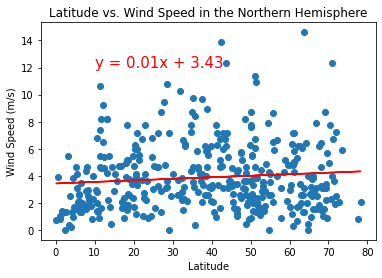

In [114]:
# Northern Hemisphere
rval7 = linreg(northern_hemi_lat, northern_hemi_df['Wind Speed'], "Latitude", "Wind Speed (m/s)", "Latitude vs. Wind Speed in the Northern Hemisphere", 10, 12)

The r-value is -0.18782442868639657.


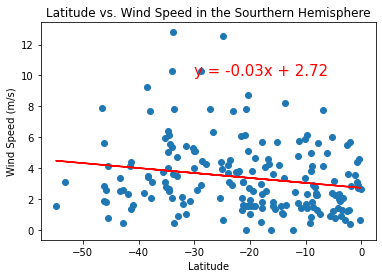

In [115]:
# Southern Hemisphere
rval8 = linreg(southern_hemi_lat, southern_hemi_df['Wind Speed'], "Latitude", "Wind Speed (m/s)", "Latitude vs. Wind Speed in the Sourthern Hemisphere", -30, 10)

In [116]:
md(f"**Discussion about the linear relationship:** In the northern hemisphere, there is almost no correlation between latitude and wind speed, with an r-value of {rval7}. In the southern hemisphere there is just a slight negative correlation between latitude and wind speed, with an r-value of {rval8}.")

**Discussion about the linear relationship:** In the northern hemisphere, there is almost no correlation between latitude and wind speed, with an r-value of 0.0968740667390189. In the southern hemisphere there is just a slight negative correlation between latitude and wind speed, with an r-value of -0.18782442868639657.